## Import Packages

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [110]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [111]:
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [112]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


### 5. How many rows and columns are in gdp_df? What are the data types of each column?

In [114]:
gdp_df.shape

(7662, 4)

7662 rows, 4 columns

In [116]:
type(gdp_df)

pandas.core.frame.DataFrame

In [117]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


### 6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [119]:
gdp_df = gdp_df.drop('Value Footnotes', axis= 'columns')

In [120]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [121]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [103]:
#all_countries = gdp_df.groupby('Country')['Year'].count().sort_values(ascending=False)

In [104]:
#all_countries

Country
Least developed countries: UN classification          33
Middle East & North Africa                            33
Middle East & North Africa (excluding high income)    33
Middle income                                         33
Mongolia                                              33
                                                      ..
Kosovo                                                15
Sint Maarten (Dutch part)                             14
Turks and Caicos Islands                              12
Somalia                                               10
Djibouti                                              10
Name: Year, Length: 242, dtype: int64

In [105]:
#all_countries.reset_index()

,Country,Year
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (excluding high inc...,33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [135]:
gdp_df['Year'].nunique()

33

In [137]:
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [139]:
gdp_df['Country'].value_counts().reset_index()

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [153]:
count_df = gdp_df['Country'].value_counts().reset_index()

In [155]:
count_df

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [157]:
count_df[count_df['count']==33]

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
197,Finland,33
198,Europe & Central Asia (excluding high income),33
199,Ghana,33
200,Euro area,33


In [159]:
count_df[count_df['count']==33].count()

Country    202
count      202
dtype: int64

In [161]:
count_df[count_df['count']<33]

,Country,count
202,Hungary,32
203,Lebanon,32
204,Aruba,32
205,Tonga,32
206,Bhutan,32
207,Slovak Republic,31
208,Kuwait,31
209,Turkmenistan,31
210,Cambodia,30
211,West Bank and Gaza,29


In [165]:
count_df[count_df['count']<33]['Country'].count()

40

202 countries have data for all years, 40 countries are missing data

### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [169]:
gdp_df[gdp_df['Year']==2020]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [171]:
df_2020 = gdp_df[gdp_df['Year']==2020]

<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

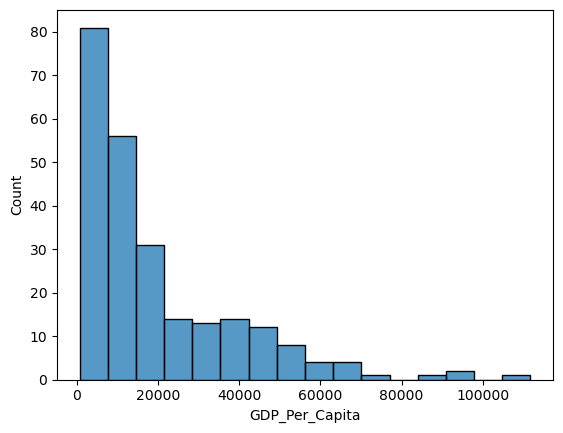

In [421]:
sns.histplot(data=df_2020, x='GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

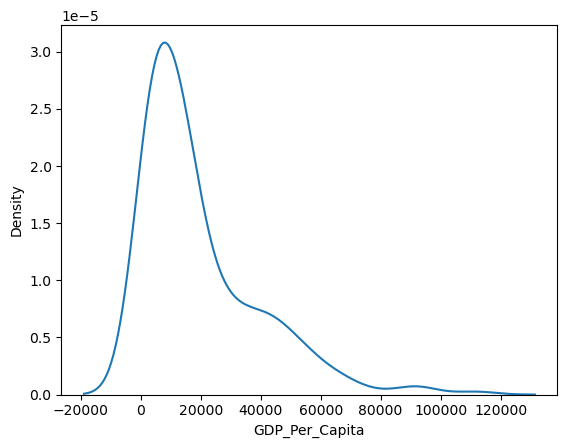

In [423]:
sns.kdeplot(data=df_2020, x='GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita'>

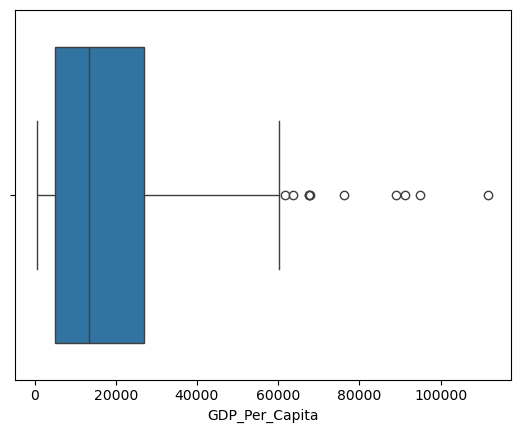

In [425]:
sns.boxplot(data=df_2020, x='GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita'>

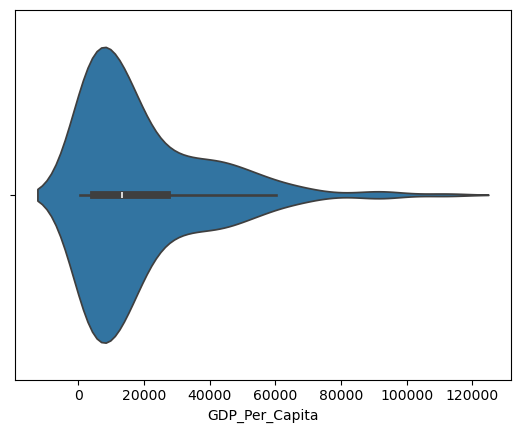

In [427]:
sns.violinplot(data=df_2020, x='GDP_Per_Capita')

### 9. What was the median GDP per capita value in 2020?

In [174]:
df_2020['GDP_Per_Capita'].median()

13357.997573370474

### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots: A boxplot, A barplot, A scatterplot, A scatterplot with a trend line overlaid. Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [177]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [179]:
gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [181]:
my_years = [1990, 2000, 2010, 2020]

In [185]:
gdp_df[gdp_df['Year'].isin(my_years)]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [189]:
gdp_decades = gdp_df[gdp_df['Year'].isin(my_years)]

In [191]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

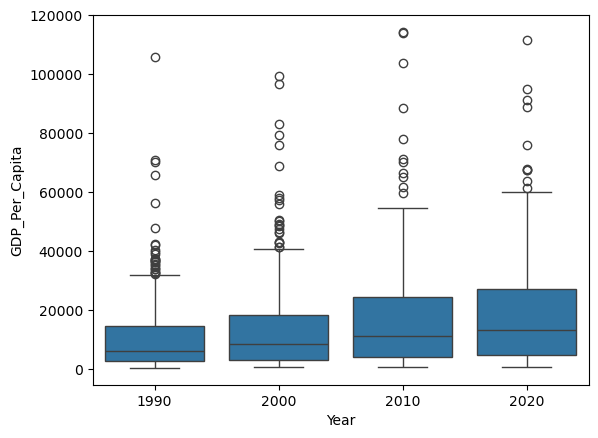

In [194]:
#box plot
sns.boxplot(data = gdp_decades,
           x='Year',
           y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

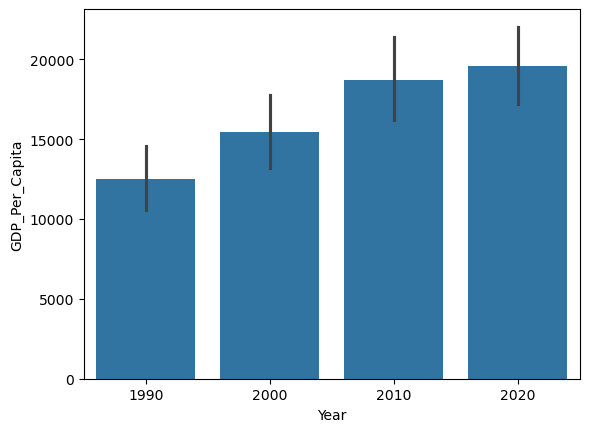

In [429]:
sns.barplot(data = gdp_decades,
           x='Year',
           y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

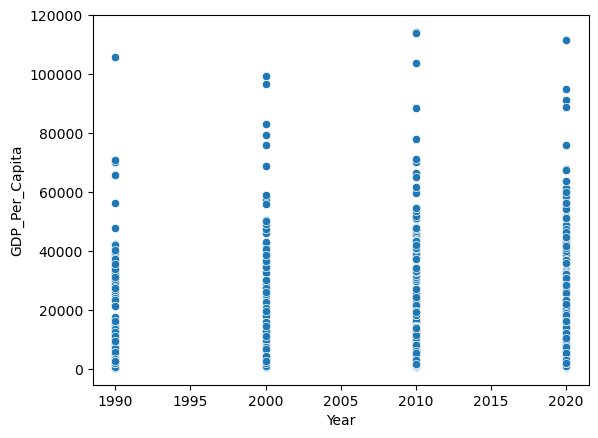

In [431]:
sns.scatterplot(data = gdp_decades,
           x='Year',
           y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

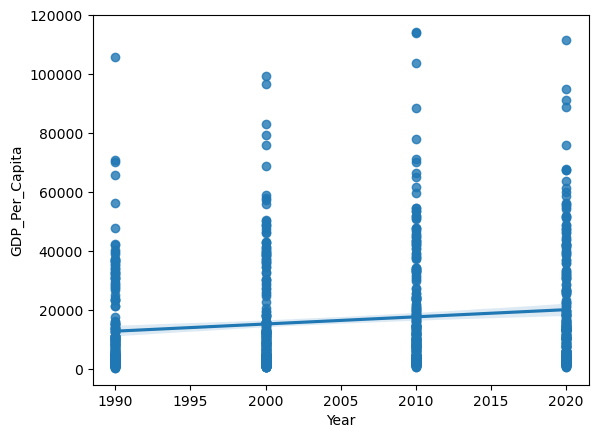

In [433]:
sns.regplot(data = gdp_decades,
           x='Year',
           y = 'GDP_Per_Capita')

### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [198]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


United Arab Emirates

### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [202]:
gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')#['Country'].tolist()[0]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [204]:
gdp_df[gdp_df['Country']=='Luxembourg']

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


In [206]:
top_country = gdp_df[gdp_df['Country']=='Luxembourg']

<Axes: xlabel='Year'>

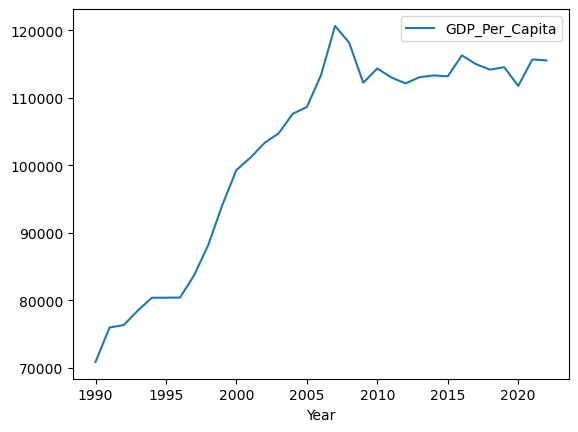

In [208]:
top_country.plot(x='Year', y='GDP_Per_Capita', kind='line')

### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [211]:
gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [213]:
gdp_df[gdp_df['Country']=='Burundi']

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


In [215]:
bottom_country = gdp_df[gdp_df['Country']=='Burundi']

<Axes: xlabel='Year'>

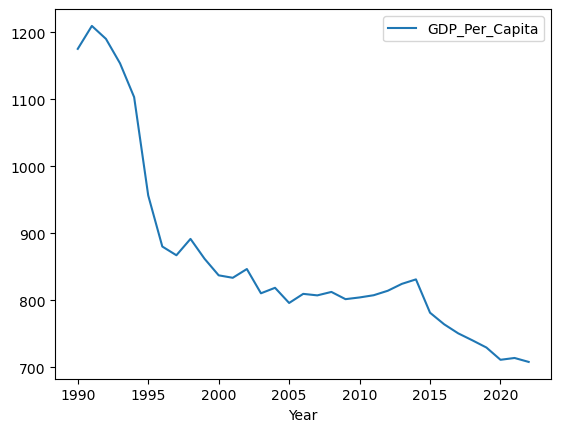

In [217]:
bottom_country.plot(x='Year', y='GDP_Per_Capita', kind='line')

### 14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors. Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [375]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=6083)

In [377]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [379]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


### 15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [381]:
internet_df = internet_df.drop('Value Footnotes', axis= 'columns')

In [383]:
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [385]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


### 16. Look at the number of observations in this dataset per year. What do you notice?

In [387]:
internet_df['Country'].value_counts().head(10)

Country
Sweden                  34
Germany                 34
Denmark                 34
Portugal                33
Korea (Republic  of)    33
Spain                   33
South Africa            33
Greece                  33
Poland                  33
Brazil                  33
Name: count, dtype: int64

Only 3 countries have full data.

### 17. What is the first year to have a non-zero internet users percentage value?

In [389]:
internet_df[internet_df['Internet_Users_Pct']>=1].sort_values('Year')

,Country,Year,Internet_Users_Pct
4196,Norway,1991,1.40740
5331,Switzerland,1991,1.17996
2000,Finland,1991,1.39744
305,Australia,1991,1.09720
5809,United States,1991,1.16319
...,...,...,...
2159,Germany,2023,92.47640
5266,Sweden,2023,95.70330
3323,Luxembourg,2023,99.34790
3141,Latvia,2023,92.18790


1991

### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [397]:
internet_df[internet_df['Year'].isin([2000, 2014])]

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


There is a substantial increase of percentage in 2014.

### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [399]:
internet_df[(internet_df['Year']==2014) & (internet_df['Internet_Users_Pct']<5)].count()

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64

### 20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [413]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='outer') #on=['Country', 'Year']

In [415]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
...,...,...,...,...
9107,Zimbabwe,2018,2399.621551,25.000000
9108,Zimbabwe,2019,2203.396810,26.588300
9109,Zimbabwe,2020,1990.319419,29.298600
9110,Zimbabwe,2021,2115.144555,32.461600


### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [443]:
gdp_and_internet_use[gdp_and_internet_use['Year']==2014].sort_values('Internet_Users_Pct', ascending=False).head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3820,Iceland,2014,50450.741612,98.158
2780,Falkland (Malvinas) Islands,2014,NaN,97.600
794,Bermuda,2014,77361.104881,96.800


Iceland, Falkland (Malvinas) Islands, Bermuda

In [445]:
high_internet = gdp_and_internet_use[gdp_and_internet_use['Year']==2014].sort_values('Internet_Users_Pct', ascending=False).head(3)

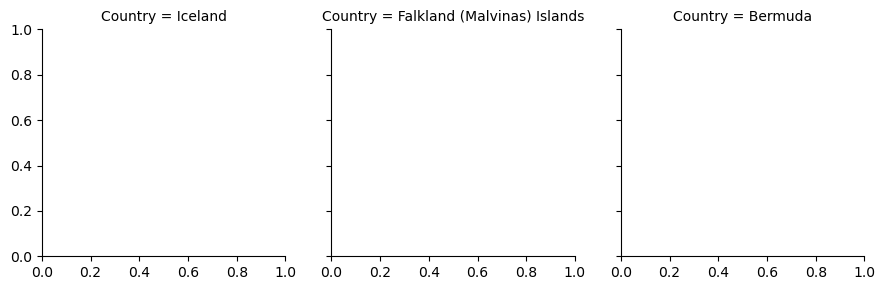

In [457]:
i = sns.FacetGrid(high_internet, col='Country')

In [473]:
i.map(sns.scatterplot, 'GDP_Per_Capita')

In [475]:
plt.show()